<a href="https://colab.research.google.com/github/Sonypriyasonu/AI/blob/master/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Reading data

In [3]:
data=pd.read_csv("/content/GPA Vs SAT.csv")
print(data)

     SAT   GPA
0   1714  2.40
1   1664  2.52
2   1760  2.54
3   1685  2.74
4   1693  2.83
..   ...   ...
79  1936  3.71
80  1810  3.71
81  1987  3.73
82  1962  3.76
83  2050  3.81

[84 rows x 2 columns]


# Scatter plot

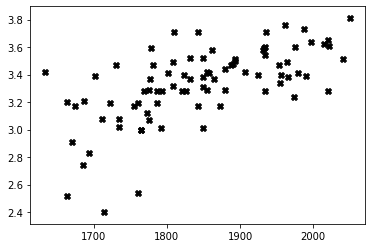

In [32]:
plt.scatter(data['SAT'],data["GPA"],color="black",marker="X")
plt.show()

In [21]:
data.corr()

,SAT,GPA
SAT,1.000000,0.637184
GPA,0.637184,1.000000


# Train-Test split




In [0]:
X_train,X_test,y_train,y_test=train_test_split(np.asarray(data['SAT']),np.asarray(data['GPA']),test_size=0.2,random_state=123)

In [34]:
print(data.shape)
print("\n")
print(X_train.shape)
print("\n")
print(X_test.shape)
print("\n")
print(y_train.shape)
print("\n")
print(y_test.shape)

(84, 2)


(67,)


(17,)


(67,)


(17,)


In [0]:
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)

X_test=X_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)


In [40]:
print(data.shape)
print("\n")
print(X_train.shape)
print("\n")
print(X_test.shape)
print("\n")
print(y_train.shape)
print("\n")
print(y_test.shape)

(84, 2)


(67, 1)


(17, 1)


(67, 1)


(17, 1)


In [42]:
lin_model=LinearRegression(normalize=True)
lin_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [44]:
lin_model.coef_

array([[0.00175421]])

In [45]:
lin_model.intercept_

array([0.08665701])

In [48]:
preds=lin_model.predict(X_test)
preds

array([[3.47754069],
       [3.04600557],
       [3.05653082],
       [3.48280332],
       [3.40737238],
       [3.20563848],
       [3.58980999],
       [3.51437906],
       [3.4792949 ],
       [3.31966199],
       [3.23019739],
       [3.46350703],
       [3.33194145],
       [3.34071249],
       [3.12143651],
       [3.30036571],
       [3.54946321]])

In [49]:
preds.shape

(17, 1)

In [0]:
y_test=y_test.reshape(-1,)
preds=preds.reshape(-1,)

In [51]:
print(y_test.shape)
print(preds.shape)

(17,)
(17,)


In [52]:
diff=pd.DataFrame({"Actual":y_test,'predicted':preds})
diff

,Actual,predicted
0,3.59,3.477541
1,3.21,3.046006
2,2.83,3.056531
3,3.71,3.482803
4,3.50,3.407372
5,3.59,3.205638
6,3.64,3.589810
7,3.34,3.514379
8,3.28,3.479295
9,3.71,3.319662


In [53]:
mean_squared_error(diff['Actual'],diff['predicted'])

0.055985577920230685

In [54]:
((diff['Actual']-diff['predicted'])**2).mean()

0.05598557792023068

In [0]:
X_std=(X_train-X_train.mean())/X_train.std()
X_test_std=(X_test-X_train.mean())/X_train.std()

In [60]:
X_std=sm.add_constant(X_std)
X_std

array([[ 1.        , -0.52582694],
       [ 1.        , -0.37490686],
       [ 1.        ,  1.13429388],
       [ 1.        , -0.4503669 ],
       [ 1.        ,  0.84188623],
       [ 1.        ,  1.68137915],
       [ 1.        , -0.57298946],
       [ 1.        , -1.6765925 ],
       [ 1.        ,  1.69081165],
       [ 1.        ,  1.87946174],
       [ 1.        ,  1.39840401],
       [ 1.        ,  0.48345106],
       [ 1.        , -0.76163955],
       [ 1.        , -0.6484495 ],
       [ 1.        , -1.31815733],
       [ 1.        , -0.81823458],
       [ 1.        , -0.51639443],
       [ 1.        , -0.73334204],
       [ 1.        ,  1.25691644],
       [ 1.        , -1.95956764],
       [ 1.        ,  0.28536846],
       [ 1.        ,  1.63421662],
       [ 1.        ,  0.00239332],
       [ 1.        , -1.22383228],
       [ 1.        , -1.68602501],
       [ 1.        , -1.00688467],
       [ 1.        ,  0.46458605],
       [ 1.        , -0.62958449],
       [ 1.        ,

In [64]:
model_sm=sm.OLS(y_train,X_std).fit()
model_sm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     55.83
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           2.53e-10
Time:                        11:22:05   Log-Likelihood:                 12.540
No. Observations:                  67   AIC:                            -21.08
Df Residuals:                      65   BIC:                            -16.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3175      0.025    133.285      0.000       3.268       3.367
x1             0.1860      0.025      7.472      0.000       0.136       0.236
==============================================================================
Omnibus:                       17.145   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.026
Skew:                          -0.927   Prob(JB):                     1.35e-06
Kurtosis:                       5.499   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""